# 1. Ответы на вопросы

### 1. Вывод аналитического решения задачи регрессии в векторной форме

**Постановка задачи:**  
Дано:  
- $X$ — матрица признаков (размер n на m, где n — число наблюдений, m — число признаков + 1 для свободного члена),
- $y$ — вектор целевых значений (размер n на 1),
- $W$ — вектор коэффициентов (размер m на 1). 

**Цель:**
Найти веса $w$, минимизирующие функцию потерь:  
```math
L(w) = ||y - X\mathbf{\omega}||^2
```
**Решение:**  
1. Раскрываем квадрат:  
```math
L(w) = (y - Xw)^T (y - Xw) = y^T y - y^T X w - (X w)^T y + (X w)^T X w = y^T y - 2w^T X^T y + w^T X^T X w
```  
(Здесь использовано: $y^T X w = (X w)^T y$, так как это скаляр)

2. Берём градиент (производную по $w$) и приравниваем к нулю:  
```math
\nabla_w L(w) = -2 X^T y + 2 X^T X w = 0
```
3. Решаем уравнение:  
```math
−2X^T y+2X^T Xw= 0
```
```math
X^T X w = X^T y
``` 
4. Если $X^T X$ обратима, получаем:  
```math
w = (X^T X)^{-1} X^T y
```

**Итог:**  
Аналитическое решение по нахождению коэффицентов регрессии — $w = (X^T X)^{-1} X^T y $

---
### 2. Изменения в решении при добавлении L1 и L2 регуляризации

- #### L2-регуляризация (Ridge) 
При L2-регуляризации функция потерь принимает вид:
```math
L(w) = ||y - X\mathbf{\omega}||^2 + \lambda \|w\|_2^2
```
где:
$\|w\|_2^2 = \left(\sqrt{\sum_{j=1}^{m} w_j^2}\right)^2 = \sum_{j=1}^{m} w_j^2$ - квадрат нормы l2

**Решение:**  
1. Раскрываем квадрат:  
```math
L(w) = (y - Xw)^T (y - Xw) + \lambda w^t w = y^T y - 2w^T X^T y + w^T (X^T X + \lambda I) w
```  
где:
$I$ - единичная матрица

2. Берём градиент (производную по $w$) и приравниваем к нулю:  
```math
-2 X^T y + 2 (X^T X + \lambda I) w = 0
```
3. Решаем уравнение:  

```math
w (X^T X + \lambda I) = X^T y
``` 
```math
w = (X^T X + \lambda I)^{-1} X^T y
```
**Эффект:**  
- Веса уменьшаются пропорционально $\lambda \$, но не обнуляются
- Решает проблему мультиколлинеарности
---
- #### L1-регуляризация (Lasso) 
**Функция потерь:**  
```math
L(w) = \frac{1}{n} ||y - X\mathbf{\omega}||^2 + \lambda \| w \|_1
```
где:
$\|w\|_1 = \sum_{j=1}^{m} |w_j|$ - норма весов l1

**Решение:**  
налитического решения нет из-за недифференцируемости L1-нормы

**Эффект:**  
- Некоторые веса обнуляются при достаточно большом $ \lambda \$  
- Происходит отбор признаков (слабые признаки обнуляются)
---


### 3. Почему L1-регуляризация обнуляет веса и выбирает признаки

**Причина обнуления:**  
- L1-норма ($ \| w \|_1 = \sum |w_i| $) имеет "острую" форму условия оптимизации в точках, где некоторые $ w_i = 0 $
- Оптимальное решение часто лежит на оси координат (обнуление некоторых $ w_i $)

**Отбор признаков:**  
- Обнулённые веса соответствуют незначимым признакам
- Пример: если \( w = [0.5, 0, -0.3] \), то второй признак исключается из модели

---

### 4. Как моделировать нелинейные зависимости линейными моделями

Для нелинейных зависимостей следует использовать нелинейные преобразования признаков, например, полиномиальные признаки, логарифмы ($log$), экспоненты ($exp$), синусы ($sin$) и т.д.

# 2. Введение. Предварительная обработка данных

### Импорт необходимых библиотек

In [4]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
import statsmodels
import matplotlib.pyplot as plt
import seaborn as sns
import re
import collections
import random
from sklearn.linear_model import Ridge, Lasso, ElasticNet


### Загрузка данных

1. #### Обучающая выборка

In [5]:
train_df = pd.read_json('../../data/train.json')
train_df = train_df[['bathrooms', 'bedrooms', 'price', 'interest_level', 'features']]
train_df.head(10)

,bathrooms,bedrooms,price,interest_level,features
4,1.0,1,2400,medium,"[Dining Room, Pre-War, Laundry in Building, Di..."
6,1.0,2,3800,low,"[Doorman, Elevator, Laundry in Building, Dishw..."
9,1.0,2,3495,medium,"[Doorman, Elevator, Laundry in Building, Laund..."
10,1.5,3,3000,medium,[]
15,1.0,0,2795,low,"[Doorman, Elevator, Fitness Center, Laundry in..."
16,1.0,3,7200,low,"[Doorman, Elevator, Loft, Dishwasher, Hardwood..."
18,2.0,3,6000,low,"[Fireplace, Laundry in Unit, Dishwasher, Hardw..."
19,1.0,0,1945,high,"[Elevator, Laundry in Building, Dishwasher, Ha..."
23,0.0,1,2435,low,[Hardwood Floors]
32,3.0,3,6850,low,"[Cats Allowed, Dogs Allowed]"


#### Заметим, что пропусков в признаках обучающей выборки нет

In [6]:
train_df.info()
train_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bathrooms       49352 non-null  float64
 1   bedrooms        49352 non-null  int64  
 2   price           49352 non-null  int64  
 3   interest_level  49352 non-null  object 
 4   features        49352 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.3+ MB


bathrooms         0
bedrooms          0
price             0
interest_level    0
features          0
dtype: int64

#### 2. Тестовая выборка

In [7]:
test_df = pd.read_json('../../data/test.json')
test_df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
2,1.0,0,0,2016-06-17 01:23:39,Spacious studio in Prime Location. Cleanbuildi...,Sullivan Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7260,7174566,-74.0026,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/7174566_ba3a35c5...,2295,115 Sullivan Street
3,1.0,2,f9c826104b91d868e69bd25746448c0c,2016-06-21 05:06:02,For immediate access call Bryan.<br /><br />Bo...,Jones Street,"[Hardwood Floors, Dogs Allowed, Cats Allowed]",40.7321,7191391,-74.0028,41735645e0f8f13993c42894023f8e58,[https://photos.renthop.com/2/7191391_8c2f2d49...,2900,23 Jones Street
5,1.0,1,81062936e12ee5fa6cd2b965698e17d5,2016-06-16 07:24:27,Beautiful TRUE 1 bedroom in a luxury building ...,Exchange Place,"[Roof Deck, Doorman, Elevator, Fitness Center,...",40.7054,7171695,-74.0095,a742cf7dd3b2627d83417bc3a1b3ec96,[https://photos.renthop.com/2/7171695_089ffee2...,3254,20 Exchange Place


#### Заметим, что в тестовой выборке нет переменной *'interest level'*

In [8]:
test_df = test_df[['bathrooms', 'bedrooms', 'price', 'features']]
test_df

,bathrooms,bedrooms,price,features
0,1.0,1,2950,"[Elevator, Laundry in Building, Laundry in Uni..."
1,1.0,2,2850,"[Pre-War, Dogs Allowed, Cats Allowed]"
2,1.0,0,2295,"[Pre-War, Dogs Allowed, Cats Allowed]"
3,1.0,2,2900,"[Hardwood Floors, Dogs Allowed, Cats Allowed]"
5,1.0,1,3254,"[Roof Deck, Doorman, Elevator, Fitness Center,..."
...,...,...,...,...
124003,1.0,1,1700,[]
124005,1.0,2,4195,"[Doorman, Elevator, Laundry in Building, Dishw..."
124006,1.0,0,2400,"[Dogs Allowed, Cats Allowed]"
124007,2.0,2,6895,"[Doorman, Elevator, Cats Allowed, Dogs Allowed]"


#### Поэтому удалим и в обучающей выборке признак *'interest level'*

In [9]:
train_df = train_df.drop(columns='interest_level')
train_df

,bathrooms,bedrooms,price,features
4,1.0,1,2400,"[Dining Room, Pre-War, Laundry in Building, Di..."
6,1.0,2,3800,"[Doorman, Elevator, Laundry in Building, Dishw..."
9,1.0,2,3495,"[Doorman, Elevator, Laundry in Building, Laund..."
10,1.5,3,3000,[]
15,1.0,0,2795,"[Doorman, Elevator, Fitness Center, Laundry in..."
...,...,...,...,...
124000,1.0,3,2800,"[Elevator, Dishwasher, Hardwood Floors]"
124002,1.0,2,2395,"[Common Outdoor Space, Cats Allowed, Dogs Allo..."
124004,1.0,1,1850,"[Dining Room, Elevator, Pre-War, Laundry in Bu..."
124008,1.0,2,4195,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,..."


# 3. Добавление новых признаков

- #### Посмотрим столбец features. Он состоит из списков признаков

In [10]:
train_df['features']

4         [Dining Room, Pre-War, Laundry in Building, Di...
6         [Doorman, Elevator, Laundry in Building, Dishw...
9         [Doorman, Elevator, Laundry in Building, Laund...
10                                                       []
15        [Doorman, Elevator, Fitness Center, Laundry in...
                                ...                        
124000              [Elevator, Dishwasher, Hardwood Floors]
124002    [Common Outdoor Space, Cats Allowed, Dogs Allo...
124004    [Dining Room, Elevator, Pre-War, Laundry in Bu...
124008    [Pre-War, Laundry in Unit, Dishwasher, No Fee,...
124009    [Dining Room, Elevator, Laundry in Building, D...
Name: features, Length: 49352, dtype: object

- #### Удалим лишние символы

In [11]:
train_df['features'] = train_df['features'].map(lambda x: [re.sub(r'[^a-zA-Z-]', '', str(element)) for element in x])
train_df['features']

4         [DiningRoom, Pre-War, LaundryinBuilding, Dishw...
6         [Doorman, Elevator, LaundryinBuilding, Dishwas...
9         [Doorman, Elevator, LaundryinBuilding, Laundry...
10                                                       []
15        [Doorman, Elevator, FitnessCenter, LaundryinBu...
                                ...                        
124000               [Elevator, Dishwasher, HardwoodFloors]
124002    [CommonOutdoorSpace, CatsAllowed, DogsAllowed,...
124004    [DiningRoom, Elevator, Pre-War, LaundryinBuild...
124008    [Pre-War, LaundryinUnit, Dishwasher, NoFee, Ou...
124009    [DiningRoom, Elevator, LaundryinBuilding, Dish...
Name: features, Length: 49352, dtype: object

- #### Создадим список уникальных новых переменных

In [12]:
new_features = [''.join([x for x in str(element).split(' ')]) for sublist in train_df['features'] for element in sublist]
uni_features = set(new_features) 

- #### Посчитаем сколько раз встречается каждый признак

In [13]:
count_features = collections.Counter(new_features)
count_features

Counter({'Elevator': 25915,
         'CatsAllowed': 23540,
         'HardwoodFloors': 23527,
         'DogsAllowed': 22035,
         'Doorman': 20905,
         'Dishwasher': 20426,
         'NoFee': 18065,
         'LaundryinBuilding': 16345,
         'FitnessCenter': 13253,
         'Pre-War': 9148,
         'LaundryinUnit': 8738,
         'RoofDeck': 6542,
         'OutdoorSpace': 5268,
         'DiningRoom': 5136,
         'HighSpeedInternet': 4299,
         'Balcony': 2992,
         'SwimmingPool': 2730,
         'LaundryInBuilding': 2593,
         'NewConstruction': 2559,
         'Terrace': 2283,
         'Exclusive': 2167,
         'Loft': 2100,
         'GardenPatio': 1943,
         'WheelchairAccess': 1358,
         'CommonOutdoorSpace': 1293,
         'HARDWOOD': 914,
         'Fireplace': 912,
         'SIMPLEX': 908,
         'prewar': 855,
         'LOWRISE': 789,
         'Garage': 747,
         'LaundryRoom': 719,
         'ReducedFee': 699,
         'LaundryInUnit': 697

- #### Выберем топ 20 самых встречаемыx признаков

In [14]:
top_20_names = [feature for feature, count in count_features.most_common(20)]
top_20_names

['Elevator',
 'CatsAllowed',
 'HardwoodFloors',
 'DogsAllowed',
 'Doorman',
 'Dishwasher',
 'NoFee',
 'LaundryinBuilding',
 'FitnessCenter',
 'Pre-War',
 'LaundryinUnit',
 'RoofDeck',
 'OutdoorSpace',
 'DiningRoom',
 'HighSpeedInternet',
 'Balcony',
 'SwimmingPool',
 'LaundryInBuilding',
 'NewConstruction',
 'Terrace']

- #### Используя *MultiLabelBinarizer* создадим датафремы для новых 20 признаков

In [15]:
from sklearn.preprocessing import MultiLabelBinarizer

encoder = MultiLabelBinarizer(classes=top_20_names)

train_encoded = encoder.fit_transform(train_df['features']) # Для обучающей выборки
test_encoded = encoder.transform(test_df['features']) # Для тестовой выборки

d:\DataS\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:909: UserWarning: unknown class(es) ['', '-Greallocation', '-HourAttendedlobby', '-MONTHLEASESALLOWED', '-hourconcierge', '-hourconciergeanddoorman', '-hourdoorman', '-hourparkinggaragewithanelectricvehiclechargingstation', '-squarefootsundeckFreeWiFiinMarcClub', 'ABSOLUTEVALUEFORSIZELOCATION', 'AC', 'ACCentral', 'ACTFASTWILLNOTLAST', 'ACTFASTWONTLAST', 'ACTUALAPTPHOTOS', 'ACUnits', 'AFullServiceluxuryHighrise', 'AFullserviceLuxuryHighrise', 'AFullserviceLuxuryhighrise', 'ALLBRANDNEWNOFEEEXPANSIVEBRMcMANSIONPRIVATETERRACECOOKSSSKITCHENELEVLNDRYBLDGBLKSTOLTRAIN', 'ALLNEW', 'ALLUTILITIESINCLUDED', 'AMAZINGDEAL', 'AOne-of-a-KindFullServiceLuxuryHighrise', 'AOne-of-a-KindFullserviceLuxuryHighrise', 'ATMmachineon-site', 'AcceptsCreditCardsFeeApplies', 'AchedDoorways', 'ActualAptPhotos', 'ActualPhotos', 'Actualphotos', 'AfullserviceLuxuryhighrise', 'AfullserviceLuxuryresidence', 'AirCondition', 'AirConditioning', 'AirCondit

In [16]:
train_encoded_df = pd.DataFrame(train_encoded, columns=top_20_names)
test_encoded_df = pd.DataFrame(test_encoded, columns=top_20_names)
test_encoded_df

,Elevator,CatsAllowed,HardwoodFloors,DogsAllowed,Doorman,Dishwasher,NoFee,LaundryinBuilding,FitnessCenter,Pre-War,LaundryinUnit,RoofDeck,OutdoorSpace,DiningRoom,HighSpeedInternet,Balcony,SwimmingPool,LaundryInBuilding,NewConstruction,Terrace
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74654,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
74655,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
74656,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
74657,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


- #### Добавим новые признаки в датафреймы обучающей и тестовой выборок

In [17]:
# Сбрасываем индексы
train_df_reset = train_df.reset_index(drop=True)
test_df_reset = test_df.reset_index(drop=True)
# Объединяем датафреймы
train_df = pd.concat([train_df_reset, train_encoded_df], axis=1)
test_df = pd.concat([test_df_reset, test_encoded_df], axis=1)

train_df

,bathrooms,bedrooms,price,features,Elevator,CatsAllowed,HardwoodFloors,DogsAllowed,Doorman,Dishwasher,...,LaundryinUnit,RoofDeck,OutdoorSpace,DiningRoom,HighSpeedInternet,Balcony,SwimmingPool,LaundryInBuilding,NewConstruction,Terrace
0,1.0,1,2400,"[DiningRoom, Pre-War, LaundryinBuilding, Dishw...",0,1,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,1.0,2,3800,"[Doorman, Elevator, LaundryinBuilding, Dishwas...",1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1.0,2,3495,"[Doorman, Elevator, LaundryinBuilding, Laundry...",1,0,1,0,1,1,...,1,0,0,0,0,0,0,0,0,0
3,1.5,3,3000,[],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0,2795,"[Doorman, Elevator, FitnessCenter, LaundryinBu...",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49347,1.0,3,2800,"[Elevator, Dishwasher, HardwoodFloors]",1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
49348,1.0,2,2395,"[CommonOutdoorSpace, CatsAllowed, DogsAllowed,...",1,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
49349,1.0,1,1850,"[DiningRoom, Elevator, Pre-War, LaundryinBuild...",1,1,1,1,0,1,...,1,0,0,1,0,0,0,0,0,0
49350,1.0,2,4195,"[Pre-War, LaundryinUnit, Dishwasher, NoFee, Ou...",0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0


In [18]:
test_df

,bathrooms,bedrooms,price,features,Elevator,CatsAllowed,HardwoodFloors,DogsAllowed,Doorman,Dishwasher,...,LaundryinUnit,RoofDeck,OutdoorSpace,DiningRoom,HighSpeedInternet,Balcony,SwimmingPool,LaundryInBuilding,NewConstruction,Terrace
0,1.0,1,2950,"[Elevator, Laundry in Building, Laundry in Uni...",1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2850,"[Pre-War, Dogs Allowed, Cats Allowed]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0,2295,"[Pre-War, Dogs Allowed, Cats Allowed]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,2,2900,"[Hardwood Floors, Dogs Allowed, Cats Allowed]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1,3254,"[Roof Deck, Doorman, Elevator, Fitness Center,...",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74654,1.0,1,1700,[],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74655,1.0,2,4195,"[Doorman, Elevator, Laundry in Building, Dishw...",1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
74656,1.0,0,2400,"[Dogs Allowed, Cats Allowed]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74657,2.0,2,6895,"[Doorman, Elevator, Cats Allowed, Dogs Allowed]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


- #### Отделим таргет от признаков в обучающей и тестовой выборке

In [19]:
X_train = train_df.drop(columns=['features', 'price'])
y_train = train_df['price']

X_test = test_df.drop(columns=['features', 'price'])
y_test = test_df['price']

# 4. Реализация моделей - линейная регрессия

### 1. Формула предсказания линейной модели:
```math
\hat{\mathbf{y}} = \mathbf{X} \cdot \mathbf{w} + b
```
где:
- $\hat{y}$ - предсказанные значения
- $X$ - матрица признаков (размер [n_samples, n_features])
- $w$ - вектор весов (размер [n_features])
- $b$ - смещение


### 2. Функция потерь - MSE (среднеквадратичная ошибка):

```math
L = \frac{1}{B}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
```
где:
- $y_i$ - истинное значение
- $\hat{y}_i$ - предсказанное значение
- $B$ - размер мини-батча

### 3. Градиенты для SGD
Производные для обновления параметров:

Градиент по весам:

```math
\frac{\partial L}{\partial \mathbf{w}} = \frac{2}{B} \mathbf{X}^T \cdot (\mathbf{X} \cdot \mathbf{w} + b - \mathbf{y})
```
Градиент по смещению:

```math
\frac{\partial L}{\partial b} = \frac{2}{B} \sum_{i=1}^{B}(\mathbf{X} \cdot \mathbf{w} + b - \mathbf{y})
```

### 4. Обновление параметров (градиентный спуск):

```math
\mathbf{w} = \mathbf{w} - \alpha \cdot \frac{\partial L}{\partial \mathbf{w}}
```
```math
b = b - \alpha \cdot \frac{\partial L}{\partial b}
```
где $\alpha$ - скорость обучения (learning_rate)

### **Линейная регрессия** со стохастическим градиентным спуском (SGD) на **мини-батчах**

In [20]:
np.random.seed(21) # явная устанавка начального значения для генератора случайных чисел

class LinearRegressionSGD:
    def __init__(self, learning_rate=0.01, n_epochs=1000, batch_size=64, random_state=42):
        self.learning_rate = learning_rate  # Скорость обучения
        self.n_epochs = n_epochs # Количество итераций
        self.batch_size = batch_size # Размер мини-батча
        self.random_state = random_state
        self.w = None # Веса                   
        self.b = 0 # Смещение

    def fit(self, X, y):
        if hasattr(X, 'values'):  # Если это pandas объект
            X = X.values
            y = y.values
        n_rows, n_features = X.shape # Узнаем кол-во строк и признаков
        # Берем случайные веса
        self.w = np.random.randn(n_features) * 0.01 # Веса                   
        self.b = 0 # Смещение
        
        for epoch in range(self.n_epochs):
            # Перемешиваем выборку на каждой эпохе
            indices = np.random.permutation(n_rows)
            X_shuffled, y_shuffled = X[indices], y[indices] 
            for i in range(0, n_rows, self.batch_size):
                # Берем текущий батч
                X_batch = X_shuffled[i:i + self.batch_size]
                y_batch = y_shuffled[i:i + self.batch_size]
                # Вычисляем ошибку предсказания
                y_pred = X_batch @ self.w + self.b
                error = y_pred - y_batch
                # Считаем градиент
                dL_dw = (2 / self.batch_size) * (X_batch.T @ error)
                dL_db = (2 / self.batch_size) * np.sum(error)
                if np.any(np.isnan(dL_dw)):
                    print("Обнаружен NaN в градиенте! Пропускаю обновление.")
                    return
                # Обновляем веса и смещение
                self.w -= self.learning_rate * dL_dw
                self.b -= self.learning_rate * dL_db
                    
    def predict(self, X):
        return np.dot(X, self.w) + self.b



#### **Линейная регрессия** с градиентным спуском на **всей выборке**

In [21]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_epochs=500):
        self.learning_rate = learning_rate  # Скорость обучения
        self.n_epochs = n_epochs # Количество итераций
        self.w = None # Веса                   
        self.b = 0 # Смещение

    def fit(self, X, y):
        n_rows, n_features = X.shape

        self.w = np.random.randn(n_features) * 0.01                 
        self.b = 0
        
        for _ in range(self.n_epochs):
            
            y_pred = np.dot(X, self.w) + self.b
            error = y_pred - y

            dL_dw = (2 / n_rows) * np.dot(X.T, error)
            dL_db = (2 / n_rows) * np.sum(error)
                
            self.w -= self.learning_rate * dL_dw
            self.b -= self.learning_rate * dL_db
                    
    def predict(self, X):
        return np.dot(X, self.w) + self.b


#### **Линейная регрессия** аналитическое решение

In [22]:
class LinearRegressionMatrix:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        stolb_ones = np.ones((len(X), 1))
        X = np.hstack((stolb_ones, X))

        k = np.linalg.pinv(X.T @ X) @ (X.T @ y) # np.linalg.pinv - вычисление псевдообратной матрицы (устойчиво к вырожденным матрицам)
        self.coef_ = k[1::]
        self.intercept_ = k[0]

    def predict(self, X):
        X = np.array(X)
        y_pred = X @ self.coef_ + self.intercept_
        return y_pred

### Что такое детерменированная модель?
**Детерминированная** модель **всегда** даёт **одинаковый результат** при одинаковых входных данных и параметрах. В SGD случайность возникает из-за перемешивания данных, но если зафиксировать random_state, то модель становится детерминированной.

#### Функция для расчета **метрики R^2**

In [23]:
def R2(y, y_pred):
    SSres = np.sum((y - y_pred) ** 2)
    y_mean = y.mean()
    SStot = np.sum((y - y_mean)**2)
    return 1 - (SSres / SStot)


## Сравнение *моей реализации* и линейной регрессии *sklearn*

In [24]:
# Моя модель на мини-батчах
modelSGD = LinearRegressionSGD()
modelSGD.fit(X_train, y_train)
y_predsgd = modelSGD.predict(X_test)
RMSE_my = root_mean_squared_error(y_test, y_predsgd)
MAE_my = mean_absolute_error(y_test, y_predsgd)
R2_my = R2(y_test, y_predsgd)
R2_my_sk = r2_score(y_test, y_predsgd) 

In [25]:
# Моя модель на всей выборке
modelGD = LinearRegressionSGD()
modelGD.fit(X_train, y_train)
y_predgd = modelSGD.predict(X_test)
RMSE_mygd = root_mean_squared_error(y_test, y_predgd)
MAE_mygd = mean_absolute_error(y_test, y_predgd)
R2_mygd = R2(y_test, y_predgd)
R2_mygd_sk = r2_score(y_test, y_predgd) 

In [26]:
# Моя модель аналитическое решение
modelmatrix = LinearRegressionMatrix()
modelmatrix.fit(X_train, y_train)
y_predmat = modelmatrix.predict(X_test)
RMSE_mymat = root_mean_squared_error(y_test, y_predmat)
MAE_mymat = mean_absolute_error(y_test, y_predmat)
R2_mymat = R2(y_test, y_predmat)
R2_mymat_sk = r2_score(y_test, y_predmat) 

In [27]:
# Sklearn
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
RMSE_def = root_mean_squared_error(y_test, y_pred)
MAE_def = mean_absolute_error(y_test, y_pred)
R2_def = R2(y_test, y_pred)
R2_def_sk = r2_score(y_test, y_pred)

In [28]:
results = {
    "Model": ["LinearRegressionSGD (Mini-batch)", "LinearRegressionGD (Full-batch)", "LinearRegression analitical solution", "Sklearn LinearRegression"],
    "RMSE": [RMSE_my, RMSE_mygd, RMSE_mymat, RMSE_def],
    "MAE": [MAE_my, MAE_mygd, MAE_mymat, MAE_def],
    "R² sklearn": [R2_my_sk, R2_mygd_sk, R2_mymat_sk, R2_def_sk],
    "R² my realization": [R2_my, R2_mygd, R2_mymat, R2_def]
}

df_results = pd.DataFrame(results)
df_results

,Model,RMSE,MAE,R² sklearn,R² my realization
0,LinearRegressionSGD (Mini-batch),9643.293774,1241.209957,0.014307,0.014307
1,LinearRegressionGD (Full-batch),9643.293774,1241.209957,0.014307,0.014307
2,LinearRegression analitical solution,9647.738855,1271.888482,0.013398,0.013398
3,Sklearn LinearRegression,9647.738855,1271.888482,0.013398,0.013398


### Сравнение коэффициентов моделей

In [29]:
coef_sgd, intercept_sgd = modelSGD.w, modelSGD.b
coef_gd, intercept_gd = modelGD.w, modelGD.b
coef_mat, intercept_mat = modelmatrix.coef_, modelmatrix.intercept_
coef_sklearn, intercept_sklearn = model.coef_, model.intercept_

coef_comparison = pd.DataFrame({
    'Feature': ['Intercept'] + [f'Feature_{i}' for i in range(len(coef_sklearn))],
    'SGD (Mini-batch)': [intercept_sgd] + list(coef_sgd),
    'GD (Full-batch)': [intercept_gd] + list(coef_gd),
    'Analytical': [intercept_mat] + list(coef_mat),
    'Sklearn': [intercept_sklearn] + list(coef_sklearn)
})

# Различия между моделями и Sklearn
coef_comparison['Diff SGD vs Sklearn'] = coef_comparison['SGD (Mini-batch)'] - coef_comparison['Sklearn']
coef_comparison['Diff GD vs Sklearn'] = coef_comparison['GD (Full-batch)'] - coef_comparison['Sklearn']
coef_comparison['Diff Analytical vs Sklearn'] = coef_comparison['Analytical'] - coef_comparison['Sklearn']

# Вычисляем среднеквадратичную разницу между коэффициентами
mse_sgd = np.mean(coef_comparison['Diff SGD vs Sklearn']**2)
mse_gd = np.mean(coef_comparison['Diff GD vs Sklearn']**2)
mse_analytical = np.mean(coef_comparison['Diff Analytical vs Sklearn']**2)

print("\nСреднеквадратичная разница коэффициентов по сравнению с Sklearn:")
print(f"SGD (Mini-batch): {mse_sgd:.6f}")
print(f"GD (Full-batch): {mse_gd:.6f}")
print(f"Analytical: {mse_analytical:.6f}")


Среднеквадратичная разница коэффициентов по сравнению с Sklearn:
SGD (Mini-batch): 3551.537830
GD (Full-batch): 5110.560230
Analytical: 0.000000


In [30]:
coef_comparison

,Feature,SGD (Mini-batch),GD (Full-batch),Analytical,Sklearn,Diff SGD vs Sklearn,Diff GD vs Sklearn,Diff Analytical vs Sklearn
0,Intercept,-178.297658,-157.377826,-145.370833,-145.370833,-32.926825,-12.006993,1.909939e-11
1,Feature_0,2143.101618,2027.744182,2174.555054,2174.555054,-31.453436,-146.810872,-1.045919e-11
2,Feature_1,604.299842,605.885748,567.122006,567.122006,37.177836,38.763742,-2.273737e-12
3,Feature_2,514.599876,722.980122,530.327658,530.327658,-15.727782,192.652464,-1.364242e-12
4,Feature_3,-276.173437,-105.961728,-146.595398,-146.595398,-129.578038,40.633671,-7.901235e-12
5,Feature_4,-211.780872,-352.598353,-307.016222,-307.016222,95.235350,-45.582130,1.136868e-12
6,Feature_5,377.429900,572.271933,518.046049,518.046049,-140.616149,54.225885,5.002221e-12
7,Feature_6,1435.910942,1710.394735,1553.710613,1553.710613,-117.799671,156.684122,-5.229595e-12
8,Feature_7,-42.971573,-174.779352,-136.203030,-136.203030,93.231457,-38.576322,3.296918e-12
9,Feature_8,-317.731132,-468.104160,-374.214693,-374.214693,56.483560,-93.889467,7.389644e-13


### ИТОГ:
#### Моя реализация и встроенная реализация sklearn совпали
 - Аналитическая модель **полностью совпадает** с линейной регрессией из Sklearn
 - Среднеквадратичная разница SGC с Sklearn сильно зависит от гиперпараметров
 - Среднеквадратичная разница GD full-batch с Sklearn: 5110.56, необходима оптимицзация

### Создадим результирующие таблицы для MAE, RMSE, R2

In [31]:
result_MAE = pd.DataFrame(columns=['model', 'train', 'test'])
result_RMSE = pd.DataFrame(columns=['model', 'train', 'test'])
result_R2 = pd.DataFrame(columns=['model', 'train', 'test'])

In [32]:
y_pred_train = modelSGD.predict(X_train)

result_MAE.loc[0] = ['Linreg default', mean_absolute_error(y_train, y_pred_train), mean_absolute_error(y_test, y_predsgd)]
result_RMSE.loc[0] = ['Linreg default', root_mean_squared_error(y_train, y_pred_train), root_mean_squared_error(y_test, y_predsgd)]
result_R2.loc[0] = ['Linreg default', R2(y_train, y_pred_train), R2(y_test, y_predsgd)]

In [33]:
result_MAE

,model,train,test
0,Linreg default,1111.523946,1241.209957


In [34]:
result_RMSE

,model,train,test
0,Linreg default,21996.018164,9643.293774


In [35]:
result_R2

,model,train,test
0,Linreg default,0.006391,0.014307


# 5. Реализация моделей c регуляризацией - Ridge, Lasso, ElasticNet

In [36]:
class LinearRegressionRegularized:
    def __init__(self, learning_rate=0.01, n_epochs=1000, batch_size=64, random_state=42, alpha=0.1, l1_ratio=0.5, regularization='l2'):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.batch_size = batch_size 
        self.random_state = random_state
        self.regularization = regularization # Регуляризация
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.w = None              
        self.b = 0

    def fit(self, X, y):
        if hasattr(X, 'values'):  # Если это pandas объект
            X = X.values
            y = y.values
        n_rows, n_features = X.shape
        self.w = np.random.randn(n_features) * 0.01              
        self.b = 0 
        
        for _ in range(self.n_epochs):
            # Перемешиваем выборку на каждой эпохе
            indices = np.random.permutation(n_rows)
            X_shuffled, y_shuffled = X[indices], y[indices] 
            for i in range(0, n_rows, self.batch_size):

                X_batch = X_shuffled[i:i + self.batch_size]
                y_batch = y_shuffled[i:i + self.batch_size]

                y_pred = (X_batch @ self.w) + self.b
                error = y_pred - y_batch

                dL_dw = (2 / self.batch_size) * (X_batch.T @ error)
                dL_db = (2 / self.batch_size) * np.sum(error)

                # Добавляем производную регуляризации по весам к градиенту
                if self.regularization == 'l1': # Lasso
                    dReg_dw = self.alpha * (self.w > 0).astype(float) - (self.w < 0).astype(float)
                elif self.regularization == 'l2': # Ridge
                    dReg_dw = self.alpha * self.w
                elif self.regularization == 'elasticnet': # ElasticNet
                    l1 = self.alpha * self.l1_ratio * ((self.w > 0).astype(float) - (self.w < 0).astype(float))
                    l2 = self.alpha * (1 - self.l1_ratio) * self.w
                    dReg_dw = l1 + l2
                else:
                    dReg_dw = 0
                dL_dw += dReg_dw

                # Обновляем веса
                self.w -= self.learning_rate * dL_dw
                self.b -= self.learning_rate * dL_db
                    
    def predict(self, X):
        return (X @ self.w) + self.b

### Функции для обучения и добавления моделей в результирующие таблицы

In [37]:
def add_to_tables(X_train, y_train, X_test, y_test, trained_model, k, model_name=None, feature='default'):
    y_pred_test = trained_model.predict(X_test)
    y_pred_train = trained_model.predict(X_train)
    result_MAE.loc[k] = [f'{model_name} {feature}', mean_absolute_error(y_train, y_pred_train), mean_absolute_error(y_test, y_pred_test)]
    result_RMSE.loc[k] = [f'{model_name} {feature}', root_mean_squared_error(y_train, y_pred_train), root_mean_squared_error(y_test, y_pred_test)]
    result_R2.loc[k] = [f'{model_name} {feature}', R2(y_train, y_pred_train), R2(y_test, y_pred_test)]
    k += 1
    return k

def fit_and_add_to_tables(X_train, y_train, X_test, y_test, k, feature=None, model=None, many_models=None):
    if many_models is None:
        all_models = {
            'Linear': LinearRegressionMatrix(),
            'Ridge': LinearRegressionRegularized(regularization='l2', learning_rate=0.001, alpha=0.1, n_epochs=500, batch_size=128),
            'Lasso': LinearRegressionRegularized(regularization='l1', learning_rate=0.001, alpha=0.1, n_epochs=500, batch_size=128),
            'ElasticNet': LinearRegressionRegularized(regularization='elasticnet', learning_rate=0.001, alpha=0.1, l1_ratio=0.5, n_epochs=500, batch_size=128)
        }
        if model is None: # Если нужны все модели из словаря
            models_to_fit = all_models.items()
        else: # Если нужно добавить всего 1 модель 
            models_to_fit = [(model, all_models[model])]
    else:
        models_to_fit = many_models.items()

    for name, model in models_to_fit:
        model.fit(X_train, y_train)
        k = add_to_tables(X_train, y_train, X_test, y_test, trained_model=model, k=k, model_name=name, feature=feature)
    return k

#### L2 регуляризация (Ridge)

In [38]:
# Моя реализация
model_l2 = LinearRegressionRegularized(regularization='l2', alpha=0.1)
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)
# Sklearn модель
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)
y_pred_rid = model_ridge.predict(X_test)


add_to_tables(X_train, y_train, X_test, y_test, trained_model=model_l2, k=1, model_name='Ridge') # Добавление модели в результирующие таблицы

2

#### L1 регуляризация (Lasso)

In [39]:
# Моя реализация
model_l1 = LinearRegressionRegularized(regularization='l1', alpha=0.1)
model_l1.fit(X_train, y_train)
y_pred_l1 = model_l1.predict(X_test)
# Sklearn модель
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)

add_to_tables(X_train, y_train, X_test, y_test, trained_model=model_l1, k=2, model_name='Lasso') # Добавление модели в результирующие таблицы

3

#### ElasticNet

In [40]:
# Моя реализация
model_en = LinearRegressionRegularized(regularization='elasticnet', alpha=0.1, l1_ratio=0.5)
model_en.fit(X_train, y_train)
y_pred_en = model_en.predict(X_test)
# Sklearn модель
model_elastic = ElasticNet()
model_elastic.fit(X_train, y_train)
y_pred_elastic = model_elastic.predict(X_test)

add_to_tables(X_train, y_train, X_test, y_test, trained_model=model_en, k=3, model_name='ElasticNet') # Добавление модели в результирующие таблицы

4

In [41]:
results = {
    "Model": ['My Ridge', 'Sklearn Ridge', 'My Lasso', 'Sklearn Lasso', 'My ElasticNet', 'Sklearn ElasticNet'
    ],
    "RMSE": [
        root_mean_squared_error(y_test, y_pred_l2), root_mean_squared_error(y_test, y_pred_rid),
        root_mean_squared_error(y_test, y_pred_l1), root_mean_squared_error(y_test, y_pred_lasso),
        root_mean_squared_error(y_test, y_pred_en), root_mean_squared_error(y_test, y_pred_elastic)
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred_l2), mean_absolute_error(y_test, y_pred_rid),
        mean_absolute_error(y_test, y_pred_l1), mean_absolute_error(y_test, y_pred_lasso),
        mean_absolute_error(y_test, y_pred_en), mean_absolute_error(y_test, y_pred_elastic)
    ],
    "R²": [
        R2(y_test, y_pred_l2), R2(y_test, y_pred_rid),
        R2(y_test, y_pred_l1), R2(y_test, y_pred_lasso),
        R2(y_test, y_pred_en), R2(y_test, y_pred_elastic)
    ]
}

df_results = pd.DataFrame(results)
df_results

,Model,RMSE,MAE,R²
0,My Ridge,9632.041892,1229.010297,0.016606
1,Sklearn Ridge,9647.717564,1271.787098,0.013403
2,My Lasso,9641.154523,1193.441777,0.014744
3,Sklearn Lasso,9646.865849,1264.983107,0.013577
4,My ElasticNet,9624.535601,1104.785405,0.018138
5,Sklearn ElasticNet,9615.696831,1039.585192,0.019941


In [42]:
result_MAE

,model,train,test
0,Linreg default,1111.523946,1241.209957
1,Ridge default,1317.561429,1229.010297
2,Lasso default,1120.712348,1193.441777
3,ElasticNet default,1062.910524,1104.785405


In [43]:
result_RMSE

,model,train,test
0,Linreg default,21996.018164,9643.293774
1,Ridge default,22002.237083,9632.041892
2,Lasso default,21996.019106,9641.154523
3,ElasticNet default,21997.514097,9624.535601


## Подведем итог
#### **Результаты метрик моей реализации и sklearn схожие**
- #### Модели с регуляризацией дали лучше результаты, чем без нее
- #### ElasticNet регуляризация показал лучшие результаты на тестовой выборке:
    - RMSE: 9617.842
    - MAE: 1023.619
- #### Значения RMSE на тренировочных данных (~21996) значительно выше, чем на тестовых (~9617), что может указывать на:
    - Наличие выбросов в тренировочной выборке
    - Необходимость дополнительной предобработки данных


# 6. Нормализация признаков

#### Примеры, где нормализация является обязательной:
- Методы, основанные на расстояниях (k-NN, k-means, SVM с RBF-ядром) — чувствительны к разным масштабам признаков
- Градиентный спуск (линейная регрессия, нейронные сети) — ускоряет сходимость и избегает перекоса весов
- Методы с регуляризацией (Lasso, Ridge) — штрафы за большие веса работают корректно только при одинаковых масштабах

#### Примеры, где нормализация не нужна:
- Деревья решений и ансамбли (Random Forest, XGBoost, CatBoost) — работают с порядковыми признаками, масштаб не важен
- Бинарные/категориальные признаки — уже находятся в одном масштабе (0/1 или one-hot)

## MinMaxScaler
```math
X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}} \cdot (b - a) + a
```

Где:
- $X$ — исходное значение признака
- $X_{\min}$, $X_{\max}$ — минимальное и максимальное значения признака
- $a$, $b$ — границы целевого диапазона
- $X_{\text{scaled}}$ — масштабированное значение

In [44]:
class MyMinMaxScaler():
    def __init__(self, feature_range=(0, 1)):
        self.feature_range = feature_range
        self.a = feature_range[0]
        self.b = feature_range[1]
        self.minX = None
        self.maxX = None

    def fit(self, X):
        self.minX = np.min(X, axis=0)
        self.maxX = np.max(X, axis=0)

    def transform(self, X):
        if self.minX is None or self.maxX is None:
            raise ValueError("Сначала вызовите fit для вычисления min и max!")
        X_scl = (X - self.minX) / (self.maxX - self.minX)
        return (X_scl * (self.b - self.a) + self.a).values # Чтобы метод возвращал не датафрейм

In [45]:
X_train_to_encode = X_train[['bathrooms', 'bedrooms']]
X_train_binary = X_train.drop(columns=['bathrooms', 'bedrooms'])
X_test_to_encode = X_test[['bathrooms', 'bedrooms']]
X_test_binary = X_test.drop(columns=['bathrooms', 'bedrooms'])

In [46]:
# Моя реализация MinMaxScaler
my_scaler = MyMinMaxScaler()
my_scaler.fit(X_train_to_encode)
X_train_scaled_MM = my_scaler.transform(X_train_to_encode)
X_test_scaled_MM = my_scaler.transform(X_test_to_encode)
# Sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train_to_encode)
X_train_scaled_MM_sk = scaler.transform(X_train_to_encode)

# Сравнение результатов
print(f'My MinMaxScaler: {X_train_scaled_MM}')
print(f'Slearn MinMaxScaler: {X_train_scaled_MM_sk}')

My MinMaxScaler: [[0.1   0.125]
 [0.1   0.25 ]
 [0.1   0.25 ]
 ...
 [0.1   0.125]
 [0.1   0.25 ]
 [0.1   0.375]]
Slearn MinMaxScaler: [[0.1   0.125]
 [0.1   0.25 ]
 [0.1   0.25 ]
 ...
 [0.1   0.125]
 [0.1   0.25 ]
 [0.1   0.375]]


In [47]:
dif = np.abs(X_train_scaled_MM - X_train_scaled_MM_sk)
print("Максимальная разница между моей реализацией MinMaxScaler и sklearn:", np.max(dif))

Максимальная разница между моей реализацией MinMaxScaler и sklearn: 1.1102230246251565e-16


## StandartScaler
```math
X_{\text{scaled}} = \frac{X - \mu}{\sigma}
```

Где:
- $X$ — исходное значение признака
- $\mu$ — среднее значение признака (mean)
- $\sigma$ — стандартное отклонение (standard deviation)
- $X_{\text{scaled}}$ — стандартизированное значение

In [48]:
class MyStandardScaler():
    def __init__(self):
        self.mean = None
        self.standard_deviation = None
        self.n = None

    def fit(self, X):
        self.n = X.shape[0]
        self.mean = np.mean(X, axis=0)
        self.standard_deviation = np.sqrt(np.sum((X - self.mean) ** 2, axis=0) / self.n)

    def transform(self, X):
        if self.mean is None or self.standard_deviation is None:
            raise ValueError("Сначала вызовите fit!")
        X_scaled = (X - self.mean) / self.standard_deviation
        return X_scaled.values

In [49]:
# Моя реализация StandardScaler
my_scaler = MyStandardScaler()
my_scaler.fit(X_train_to_encode)
X_train_scaled_SS = my_scaler.transform(X_train_to_encode)
X_test_scaled_SS = my_scaler.transform(X_test_to_encode)
# Sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_to_encode)
X_train_scaled_SS_sk = scaler.transform(X_train_to_encode)

# Сравнение результатов
print(f'My StandardScaler: {X_train_scaled_SS}')
print(f'Slearn StandardScaler: {X_train_scaled_SS_sk}')

My StandardScaler: [[-0.42316255 -0.48577234]
 [-0.42316255  0.41108287]
 [-0.42316255  0.41108287]
 ...
 [-0.42316255 -0.48577234]
 [-0.42316255  0.41108287]
 [-0.42316255  1.30793808]]
Slearn StandardScaler: [[-0.42316255 -0.48577234]
 [-0.42316255  0.41108287]
 [-0.42316255  0.41108287]
 ...
 [-0.42316255 -0.48577234]
 [-0.42316255  0.41108287]
 [-0.42316255  1.30793808]]


In [50]:
dif = np.abs(X_train_scaled_SS - X_train_scaled_SS_sk)
print("Максимальная разница между моей реализацией StandardScaler и sklearn:", np.max(dif))

Максимальная разница между моей реализацией StandardScaler и sklearn: 0.0


In [51]:
# MinMaxScaler
X_train_minmax = pd.DataFrame(X_train_scaled_MM, columns=['bathrooms', 'bedrooms'])
X_train_minmax = pd.concat([X_train_minmax, X_train_binary.reset_index(drop=True)], axis=1)
X_test_minmax = pd.DataFrame(X_test_scaled_MM, columns=['bathrooms', 'bedrooms'])
X_test_minmax = pd.concat([X_test_minmax, X_test_binary.reset_index(drop=True)], axis=1)

# StandardScaler
X_train_standard = pd.DataFrame(X_train_scaled_SS, columns=['bathrooms', 'bedrooms'])
X_train_standard = pd.concat([X_train_standard, X_train_binary.reset_index(drop=True)], axis=1)
X_test_standard = pd.DataFrame(X_test_scaled_SS, columns=['bathrooms', 'bedrooms'])
X_test_standard = pd.concat([X_test_standard, X_test_binary.reset_index(drop=True)], axis=1)

In [52]:
fit_and_add_to_tables(X_train_minmax, y_train, X_test_minmax, y_test, 4, feature='MinMaxScaler')

8

In [53]:
fit_and_add_to_tables(X_train_standard, y_train, X_test_standard, y_test, 8, feature='StandardScaler')

12

In [54]:
print(f'MAE:\n{result_MAE}')
print(f'RMSE:\n{result_RMSE}')

MAE:
                        model        train         test
0              Linreg default  1111.523946  1241.209957
1               Ridge default  1317.561429  1229.010297
2               Lasso default  1120.712348  1193.441777
3          ElasticNet default  1062.910524  1104.785405
4         Linear MinMaxScaler  1155.279023  1271.888482
5          Ridge MinMaxScaler  1298.009217  1300.506399
6          Lasso MinMaxScaler  1190.975402  1309.152323
7     ElasticNet MinMaxScaler  1265.911362  1307.254454
8       Linear StandardScaler  1155.279023  1271.888482
9        Ridge StandardScaler  1079.229960  1111.679585
10       Lasso StandardScaler  1149.697546  1265.228896
11  ElasticNet StandardScaler  1099.376781  1161.723331
RMSE:
                        model         train         test
0              Linreg default  21996.018164  9643.293774
1               Ridge default  22002.237083  9632.041892
2               Lasso default  21996.019106  9641.154523
3          ElasticNet default  21

In [55]:
print(f'R2 score:\n{result_R2}')

R2 score:
                        model     train      test
0              Linreg default  0.006391  0.014307
1               Ridge default  0.005829  0.016606
2               Lasso default  0.006391  0.014744
3          ElasticNet default  0.006256  0.018138
4         Linear MinMaxScaler  0.006476  0.013398
5          Ridge MinMaxScaler  0.003508  0.010863
6          Lasso MinMaxScaler  0.006077  0.016795
7     ElasticNet MinMaxScaler  0.004266  0.012991
8       Linear StandardScaler  0.006476  0.013398
9        Ridge StandardScaler  0.006351  0.017509
10       Lasso StandardScaler  0.006475  0.013695
11  ElasticNet StandardScaler  0.006418  0.016361


# 8. Переобучение

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_df[['bathrooms', 'bedrooms']])
X_test_scaled = scaler.transform(test_df[['bathrooms', 'bedrooms']])

In [57]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)

X_train_poly = poly_features.fit_transform(X_train_scaled_SS)
X_test_poly = poly_features.transform(X_test_scaled_SS)

In [58]:
poly_columns = poly_features.get_feature_names_out(input_features=['bathrooms', 'bedrooms'])  # Имена признаков
X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly_columns)
X_test_poly_df = pd.DataFrame(X_test_poly, columns=poly_columns)

X_train_polinomial = pd.concat([X_train_poly_df.reset_index(drop=True), X_train_binary.reset_index(drop=True)], axis=1)
X_test_polinomial = pd.concat([X_test_poly_df.reset_index(drop=True), X_test_binary.reset_index(drop=True)], axis=1)

### Сравним модель линейной регрессии с моделями с регуляризацией с различными alpha

In [59]:
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
# Словарь с моделями с разными альфа
models = {}
models['LinearRegression'] = LinearRegression()
for alpha in alphas:
    models[f'Ridge (α={alpha})'] = Ridge(alpha=alpha)
for alpha in alphas:
    models[f'Lasso (α={alpha})'] = Lasso(alpha=alpha)
for alpha in alphas:
    models[f'ElasticNet (α={alpha})'] = ElasticNet(alpha=alpha, l1_ratio=0.5)

results_mae, results_rmse = [], []
for name, model in models.items():
    model.fit(X_train_polinomial, y_train)
    y_pred_train = model.predict(X_train_polinomial)
    y_pred_test = model.predict(X_test_polinomial)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    
    results_mae.append({
        'Model': name,
        'Train': mean_absolute_error(y_train, y_pred_train),
        'Test': mean_absolute_error(y_test, y_pred_test)
    })
    results_rmse.append({
        'Model': name,
        'Train': root_mean_squared_error(y_train, y_pred_train),
        'Test': root_mean_squared_error(y_test, y_pred_test)
    })

df_mae = pd.DataFrame(results_mae)
df_rmse = pd.DataFrame(results_rmse)

In [60]:
df_mae

,Model,Train,Test
0,LinearRegression,1108.570106,4023.695183
1,Ridge (α=0.01),1108.569612,4023.695544
2,Ridge (α=0.1),1108.565161,4023.698791
3,Ridge (α=1.0),1108.520669,4023.731260
4,Ridge (α=10.0),1108.078282,4024.056189
5,Ridge (α=100.0),1103.857404,4027.302136
6,Lasso (α=0.01),1108.530252,4023.853164
7,Lasso (α=0.1),1108.173212,4025.275767
8,Lasso (α=1.0),1104.771010,4039.536772
9,Lasso (α=10.0),1079.491157,4198.631285


In [61]:
df_rmse

,Model,Train,Test
0,LinearRegression,21983.173372,768485.624275
1,Ridge (α=0.01),21983.173372,768485.999313
2,Ridge (α=0.1),21983.173372,768489.374572
3,Ridge (α=1.0),21983.173372,768523.119114
4,Ridge (α=10.0),21983.173438,768859.761098
5,Ridge (α=100.0),21983.179446,772147.000588
6,Lasso (α=0.01),21983.173373,768548.996329
7,Lasso (α=0.1),21983.173472,769119.394380
8,Lasso (α=1.0),21983.183440,774823.286649
9,Lasso (α=10.0),21983.611322,830672.526148


### ИТОГ:
- Низкая ошибка на обучающих данных и высокая на тестовых указывает на **переобучение**
- С **ростом alpha** у моделей Ridge и Lasso начинают **ухудшаться результаты**
- Даже с регуляризацией сложные полиномиальные модели обычно работают хуже на тестовых данных, чем более простые модели

Эксперимент подтверждает теоретические ожидания:

Без регуляризации полиномиальные модели высокой степени сильно переобучаются

In [62]:
models = {
            'Linear': LinearRegression(),
            'Ridge': Ridge(),
            'Lasso': Lasso(),
            'ElasticNet': ElasticNet()
        }
fit_and_add_to_tables(X_train_polinomial, y_train, X_test_polinomial, y_test, 12, feature='Polinomial', many_models=models)

16

# 9. Наивные модели

In [63]:
# Среднее
mean_train = y_train.mean()
mean_test = y_test.mean()
y_pred_train = np.full_like(y_train, mean_train)
y_pred_test = np.full_like(y_test, mean_test)
result_MAE.loc[16] = ['Native mean', mean_absolute_error(y_train, y_pred_train), mean_absolute_error(y_test, y_pred_test)]
result_RMSE.loc[16] = ['Native mean', root_mean_squared_error(y_train, y_pred_train), root_mean_squared_error(y_test, y_pred_test)]

# Медиана
median_train = y_train.median()
median_test = y_test.median()
y_pred_train = np.full_like(y_train, median_train)
y_pred_test = np.full_like(y_test, median_test)
result_MAE.loc[17] = ['Native median', mean_absolute_error(y_train, y_pred_train), mean_absolute_error(y_test, y_pred_test)]
result_RMSE.loc[17] = ['Native median', root_mean_squared_error(y_train, y_pred_train), root_mean_squared_error(y_test, y_pred_test)]

# 10. Результирующие таблицы

In [64]:
result_MAE

,model,train,test
0,Linreg default,1111.523946,1241.209957
1,Ridge default,1317.561429,1229.010297
2,Lasso default,1120.712348,1193.441777
3,ElasticNet default,1062.910524,1104.785405
4,Linear MinMaxScaler,1155.279023,1271.888482
5,Ridge MinMaxScaler,1298.009217,1300.506399
6,Lasso MinMaxScaler,1190.975402,1309.152323
7,ElasticNet MinMaxScaler,1265.911362,1307.254454
8,Linear StandardScaler,1155.279023,1271.888482
9,Ridge StandardScaler,1079.229960,1111.679585


In [65]:
result_RMSE

,model,train,test
0,Linreg default,21996.018164,9643.293774
1,Ridge default,22002.237083,9632.041892
2,Lasso default,21996.019106,9641.154523
3,ElasticNet default,21997.514097,9624.535601
4,Linear MinMaxScaler,21995.072149,9647.738855
5,Ridge MinMaxScaler,22027.899628,9660.127918
6,Lasso MinMaxScaler,21999.492796,9631.114188
7,ElasticNet MinMaxScaler,22019.525817,9649.729913
8,Linear StandardScaler,21995.072149,9647.738855
9,Ridge StandardScaler,21996.458668,9627.617385


In [66]:
result_R2

,model,train,test
0,Linreg default,0.006391,0.014307
1,Ridge default,0.005829,0.016606
2,Lasso default,0.006391,0.014744
3,ElasticNet default,0.006256,0.018138
4,Linear MinMaxScaler,0.006476,0.013398
5,Ridge MinMaxScaler,0.003508,0.010863
6,Lasso MinMaxScaler,0.006077,0.016795
7,ElasticNet MinMaxScaler,0.004266,0.012991
8,Linear StandardScaler,0.006476,0.013398
9,Ridge StandardScaler,0.006351,0.017509


## Анализ результатов моделей регрессии
#### 1. Лучшая модель
ElasticNet (стандартные данные) показывает наилучшие результаты:
- Имеет наименьшую ошибку MAE на тесте (1104.78$) — это значит, в среднем её предсказания отклоняются от реальных цен меньше всего
- RMSE (9624.53$) тоже один из самых низких, что говорит об отсутствии крупных ошибок
- R² (0.018) хоть и близок к 0, но выше, чем у других моделей

#### 2. Самая стабильная модель
Ridge (стандартные данные) демонстрирует стабильность:
- Разница между Train и Test ошибками минимальна


# Дополнительная часть

### 1. Логарифмическое преобразование целевой переменной 
Если у целевой переменной "тяжёлый хвост" (сильный перекос в распределении), можно применить монотонное преобразование, чтобы сделать распределение более "удобным" для модели.
- Логарифм "сжимает" большие значения, уменьшая влияние выбросов
- Модель становится устойчивее к перекосу в данных

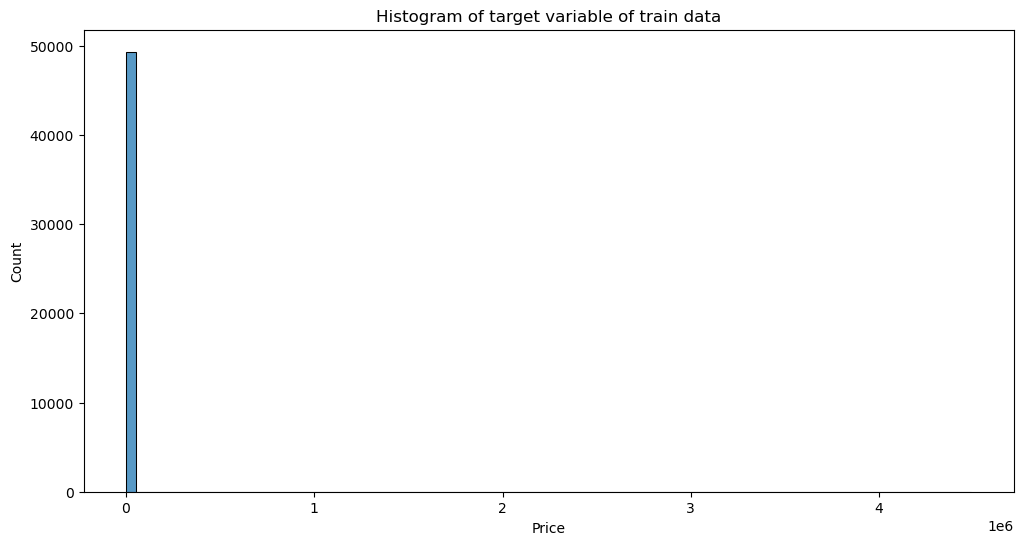

In [67]:
plt.figure(figsize=(12, 6))
sns.histplot(data=y_train, bins=80)
plt.title('Histogram of target variable of train data')
plt.xlabel('Price')
plt.show()

In [68]:
y_train_log = np.log1p(y_train) 
y_test_log = np.log1p(y_test)  # Логарифмическое преобразование данных (вычисляет натуральный логарифм от (1 + x))

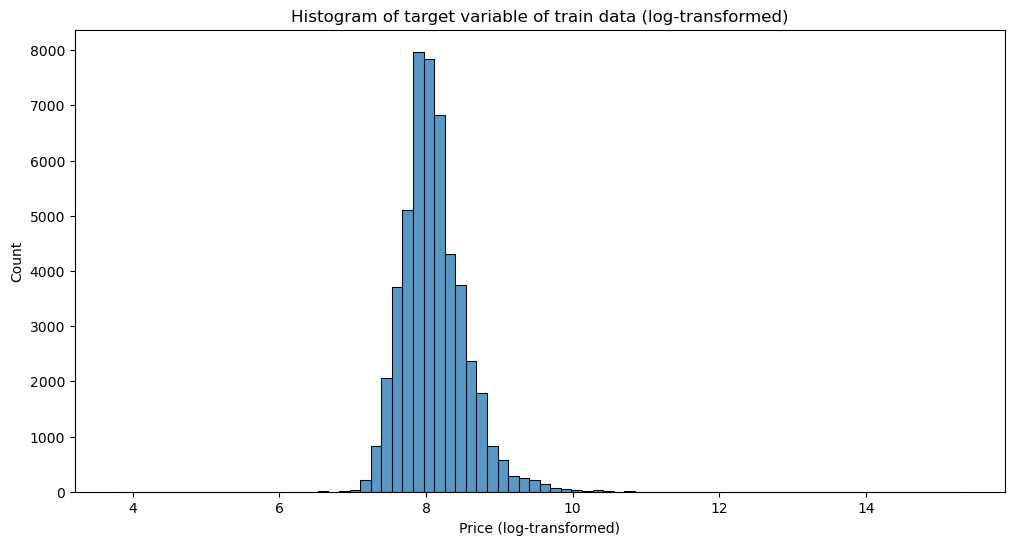

In [69]:
plt.figure(figsize=(12, 6))
sns.histplot(data=y_train_log, bins=80)
plt.title('Histogram of target variable of train data (log-transformed)')
plt.xlabel('Price (log-transformed)')
plt.show()

In [70]:
k = 18
for name, model in models.items():
    model.fit(X_train, y_train_log)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    # Обратное преобразование
    '''
    y_pred_train = np.expm1(y_pred_log_train) 
    y_pred_test = np.expm1(y_pred_log_test) '''
    result_MAE.loc[k] = [f'{name} Log-Transformed', mean_absolute_error(y_train_log, y_pred_train), mean_absolute_error(y_test_log, y_pred_test)]
    result_RMSE.loc[k] = [f'{name} Log-Transformed', root_mean_squared_error(y_train_log, y_pred_train), root_mean_squared_error(y_test_log, y_pred_test)]
    result_R2.loc[k] = [f'{name} Log-Transformed', R2(y_train_log, y_pred_train), R2(y_test_log, y_pred_test)]
    k += 1

In [71]:
result_MAE["test"] = result_MAE["test"].apply(lambda x: f"{x:.6f}")
result_RMSE["test"] = result_RMSE["test"].apply(lambda x: f"{x:.6f}")
result_R2["test"] = result_R2["test"].apply(lambda x: f"{x:.6f}")

In [72]:
result_MAE

,model,train,test
0,Linreg default,1111.523946,1241.209957
1,Ridge default,1317.561429,1229.010297
2,Lasso default,1120.712348,1193.441777
3,ElasticNet default,1062.910524,1104.785405
4,Linear MinMaxScaler,1155.279023,1271.888482
5,Ridge MinMaxScaler,1298.009217,1300.506399
6,Lasso MinMaxScaler,1190.975402,1309.152323
7,ElasticNet MinMaxScaler,1265.911362,1307.254454
8,Linear StandardScaler,1155.279023,1271.888482
9,Ridge StandardScaler,1079.229960,1111.679585


In [73]:
result_RMSE

,model,train,test
0,Linreg default,21996.018164,9643.293774
1,Ridge default,22002.237083,9632.041892
2,Lasso default,21996.019106,9641.154523
3,ElasticNet default,21997.514097,9624.535601
4,Linear MinMaxScaler,21995.072149,9647.738855
5,Ridge MinMaxScaler,22027.899628,9660.127918
6,Lasso MinMaxScaler,21999.492796,9631.114188
7,ElasticNet MinMaxScaler,22019.525817,9649.729913
8,Linear StandardScaler,21995.072149,9647.738855
9,Ridge StandardScaler,21996.458668,9627.617385


In [74]:
result_R2

,model,train,test
0,Linreg default,0.006391,0.014307
1,Ridge default,0.005829,0.016606
2,Lasso default,0.006391,0.014744
3,ElasticNet default,0.006256,0.018138
4,Linear MinMaxScaler,0.006476,0.013398
5,Ridge MinMaxScaler,0.003508,0.010863
6,Lasso MinMaxScaler,0.006077,0.016795
7,ElasticNet MinMaxScaler,0.004266,0.012991
8,Linear StandardScaler,0.006476,0.013398
9,Ridge StandardScaler,0.006351,0.017509


In [75]:
print("Минимум:", y_train.min(), "Максимум:", y_train.max())

Минимум: 43 Максимум: 4490000


### ИТОГ:
#### В данном случае логарифмирование **не улучшило метрики**.
- Гистограмма показывает сильно скошенное распределение с большим количеством наблюдений в начале диапазона и редкими, но экстремальными значениями на правом "хвосте"
- Даже после логарифмирования экстремальные значения могут влиять на модель сильнее, чем "нормальные" данные
- Ridge (L2-регуляризация) не отбирает признаки, а только штрафует большие веса. Таким образом, если в данных есть шум/выбросы, Ridge дает плохие предсказания
- Lasso (L1-регуляризация) обнуляет некоторые веса, что делает модель устойчивее к выбросам. Поэтому в этом случае Lasso сработал лучше

### 2. Обработка выбросов
#### 1) Поиск выбросов
- ### Train data

##### Как уже было отмечено, в целевой переменной есть выбросы

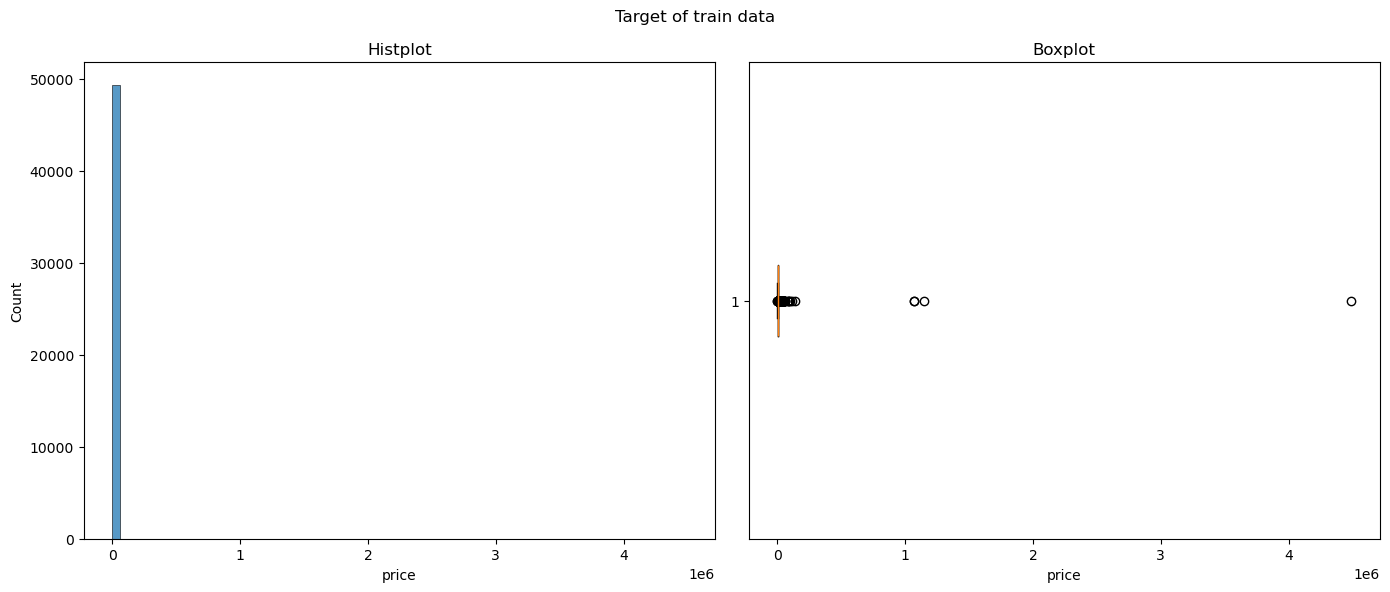

In [76]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sns.histplot(data=train_df, x='price', bins=80, ax=ax1)
ax1.set_title('Histplot')

ax2.boxplot(train_df['price'], vert=False)
ax2.set_title('Boxplot')
ax2.set_xlabel('price')

plt.suptitle('Target of train data')
plt.tight_layout()
plt.show()


#### Посмотрим, есть ли выбросs в признаках в обучающей выборке
- Bathrooms:

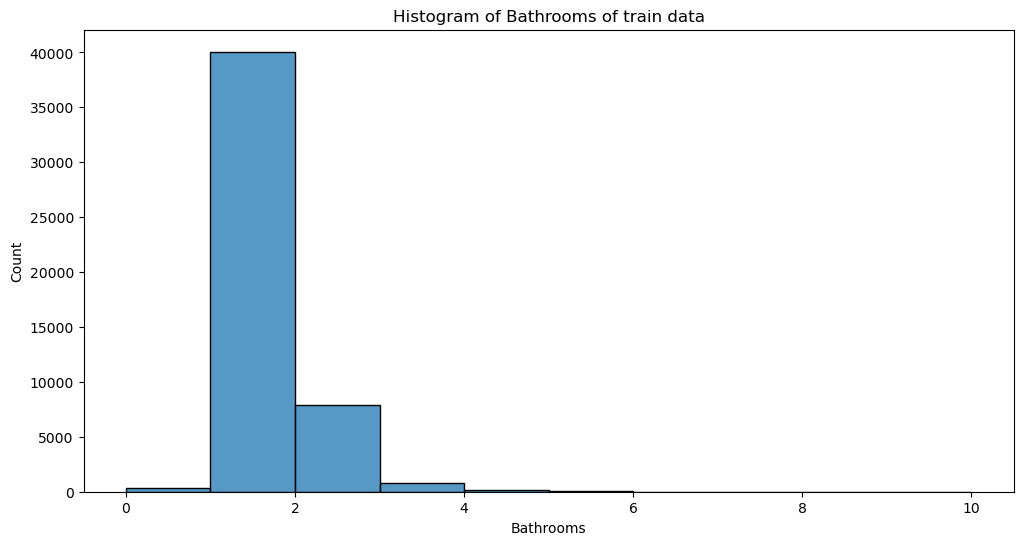

In [77]:
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x='bathrooms', bins=10)
plt.title('Histogram of Bathrooms of train data')
plt.xlabel('Bathrooms')
plt.show()

- Badrooms:

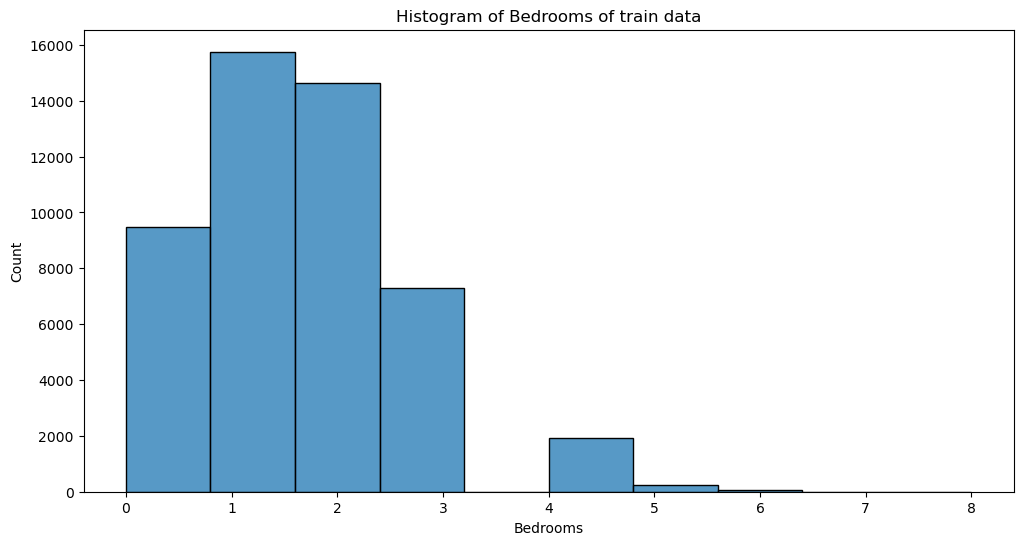

In [78]:
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x='bedrooms', bins=10)
plt.title('Histogram of Bedrooms of train data')
plt.xlabel('Bedrooms')
plt.show()

#### Заметим, что у bathrooms и bedrooms в обучающей выборке нет выбросов

- ### Test data

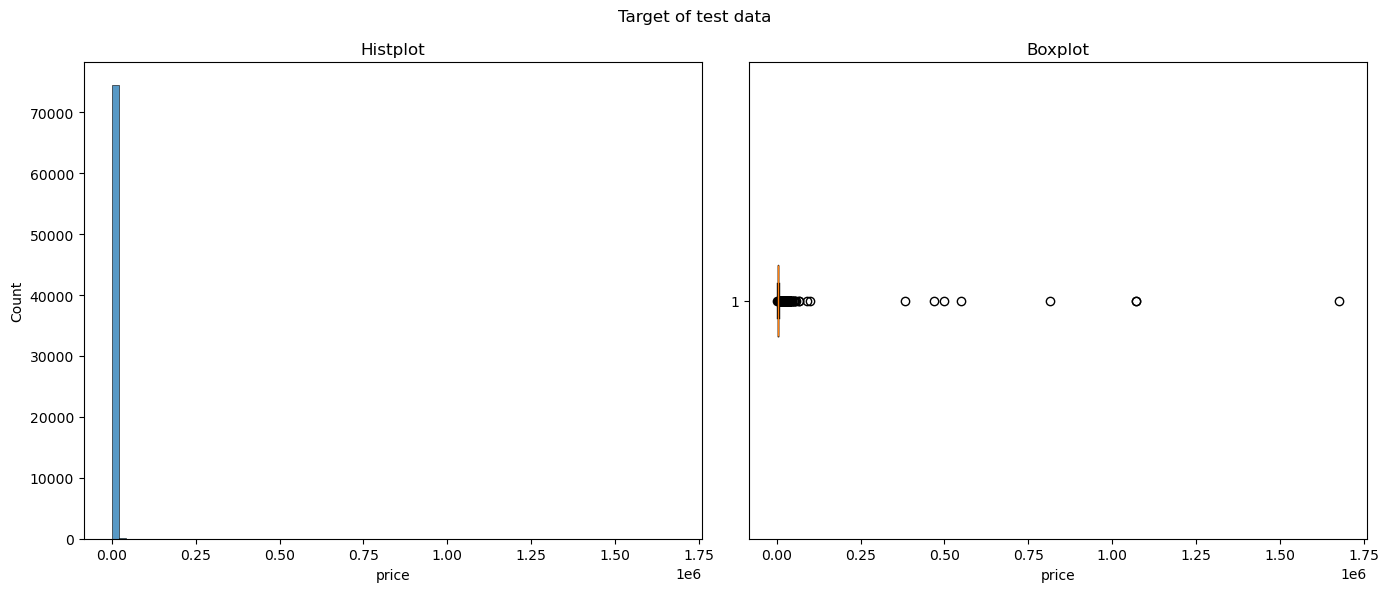

In [79]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sns.histplot(data=test_df, x='price', bins=80, ax=ax1)
ax1.set_title('Histplot')

ax2.boxplot(test_df['price'], vert=False)
ax2.set_title('Boxplot')
ax2.set_xlabel('price')

plt.suptitle('Target of test data')
plt.tight_layout()
plt.show()


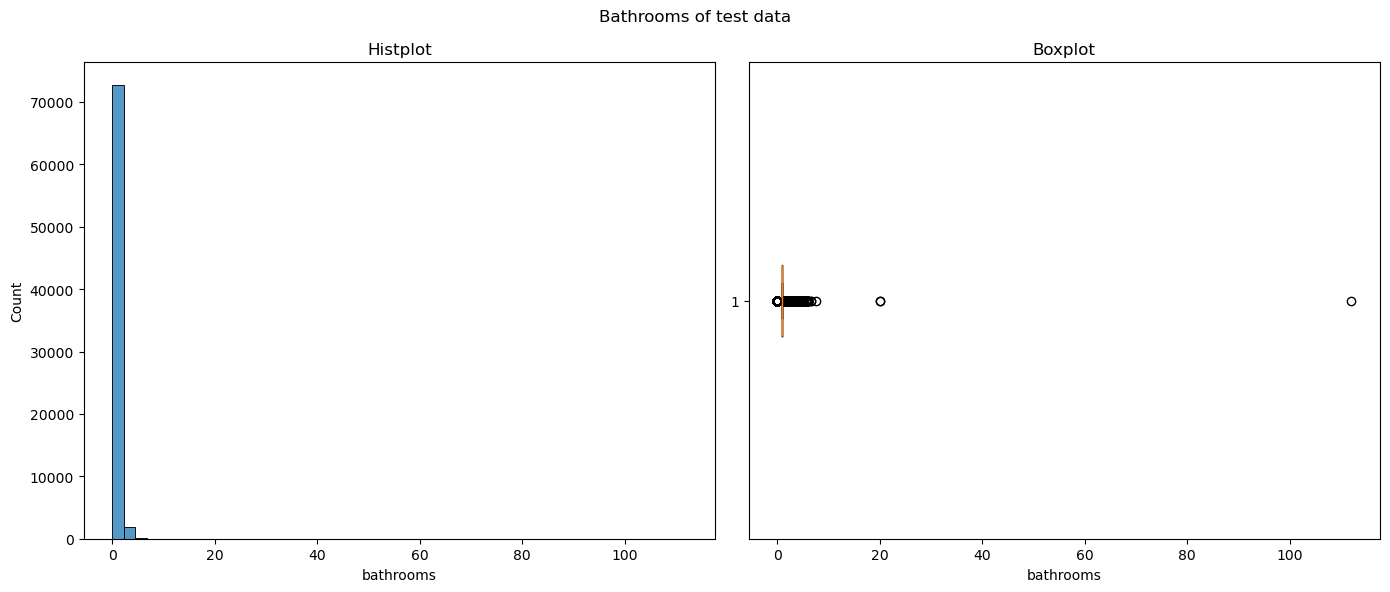

In [80]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sns.histplot(data=test_df, x='bathrooms', bins=50, ax=ax1)
ax1.set_title('Histplot')

ax2.boxplot(test_df['bathrooms'], vert=False)
ax2.set_title('Boxplot')
ax2.set_xlabel('bathrooms')

plt.suptitle('Bathrooms of test data')
plt.tight_layout()
plt.show()


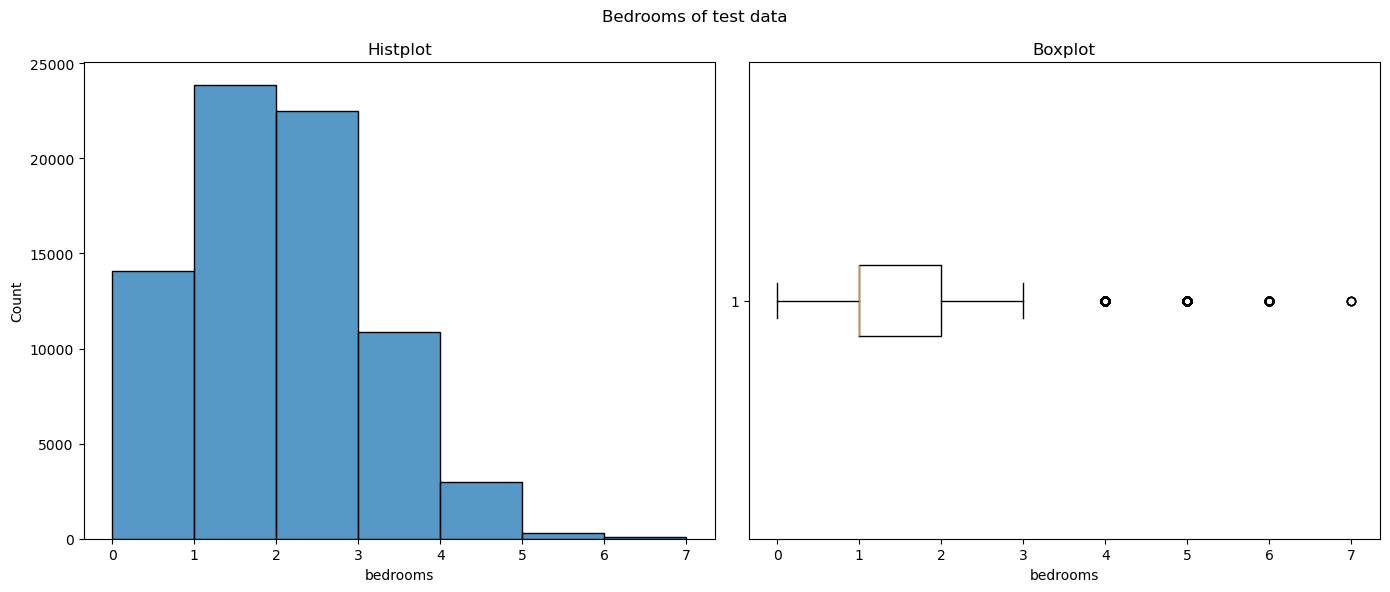

In [81]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sns.histplot(data=test_df, x='bedrooms', bins=7, ax=ax1)
ax1.set_title('Histplot')

ax2.boxplot(test_df['bedrooms'], vert=False)
ax2.set_title('Boxplot')
ax2.set_xlabel('bedrooms')

plt.suptitle('Bedrooms of test data')
plt.tight_layout()
plt.show()


Заметим, что в тестовой выборке есть выбросы, как в целевой переменной, так и в признаках

#### 2) Удаление выбросов

### Зачем удалять выбросы только в обучающей выборке для линейной регрессии?
- Линейная регрессия чувствительна к выбросам
- Модель учится только на train данных. Если выбросы есть там, они повлияют на веса коэффициентов, что скажется и на предсказаниях для test-данных
- Test выборка - «новые данные». Если удалить выбросы и в test выборке, это **исказит оценку реального качества модели**

#### Удалим выбросы **только в обучающей выборке**

In [82]:
lower_bound = train_df['price'].quantile(0.01)
upper_bound = train_df['price'].quantile(0.99)
train_df = train_df[(train_df['price'] > lower_bound) & (train_df['price'] < upper_bound)]

#### Посмотрим на график после удаления выбросов в целевой переменной

Text(0.5, 1.0, 'Histogram of target variable')

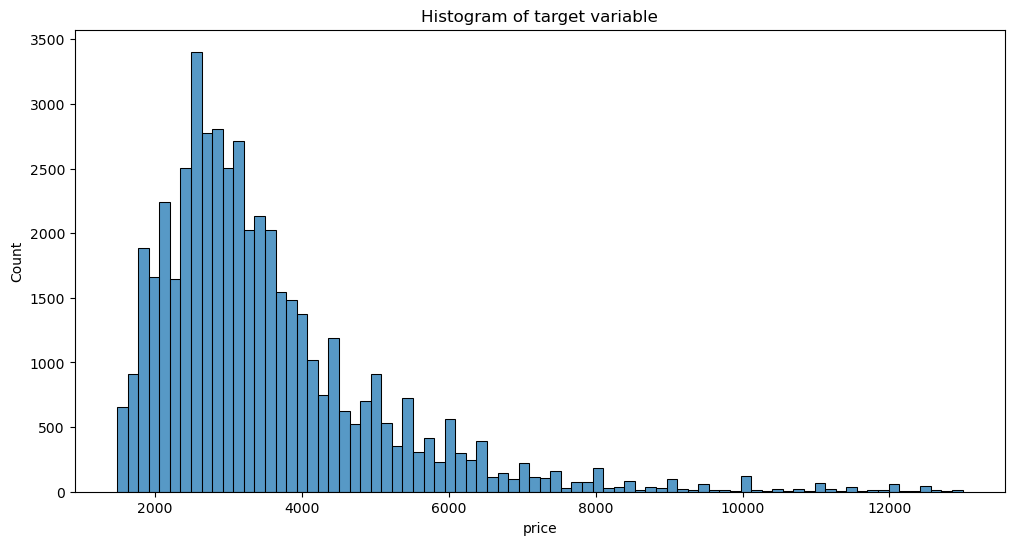

In [83]:
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x='price', bins=80)
plt.title('Histogram of target variable')

In [84]:
X_train = train_df.drop(columns=['features', 'price'])
y_train = train_df['price']

In [85]:
fit_and_add_to_tables(X_train, y_train, X_test, y_test, 22, feature='Cleaned-Data', many_models=models)

26

In [86]:
result_MAE

,model,train,test
0,Linreg default,1111.523946,1241.209957
1,Ridge default,1317.561429,1229.010297
2,Lasso default,1120.712348,1193.441777
3,ElasticNet default,1062.910524,1104.785405
4,Linear MinMaxScaler,1155.279023,1271.888482
5,Ridge MinMaxScaler,1298.009217,1300.506399
6,Lasso MinMaxScaler,1190.975402,1309.152323
7,ElasticNet MinMaxScaler,1265.911362,1307.254454
8,Linear StandardScaler,1155.279023,1271.888482
9,Ridge StandardScaler,1079.229960,1111.679585


In [87]:
result_RMSE

,model,train,test
0,Linreg default,21996.018164,9643.293774
1,Ridge default,22002.237083,9632.041892
2,Lasso default,21996.019106,9641.154523
3,ElasticNet default,21997.514097,9624.535601
4,Linear MinMaxScaler,21995.072149,9647.738855
5,Ridge MinMaxScaler,22027.899628,9660.127918
6,Lasso MinMaxScaler,21999.492796,9631.114188
7,ElasticNet MinMaxScaler,22019.525817,9649.729913
8,Linear StandardScaler,21995.072149,9647.738855
9,Ridge StandardScaler,21996.458668,9627.617385


In [88]:
result_R2

,model,train,test
0,Linreg default,0.006391,0.014307
1,Ridge default,0.005829,0.016606
2,Lasso default,0.006391,0.014744
3,ElasticNet default,0.006256,0.018138
4,Linear MinMaxScaler,0.006476,0.013398
5,Ridge MinMaxScaler,0.003508,0.010863
6,Lasso MinMaxScaler,0.006077,0.016795
7,ElasticNet MinMaxScaler,0.004266,0.012991
8,Linear StandardScaler,0.006476,0.013398
9,Ridge StandardScaler,0.006351,0.017509


### ИТОГ:
После удаления выбросов модели показали самые лучшие результаты